In [1]:
# Introduction to k Nearest Neighbours Algorithm
# k Nearest Neighbours intuition
# The problem statement
# Dataset description
# Import libraries
# Import dataset
# Exploratory data analysis
# Data visualization
# Declare feature vector and target variable
# Split data into separate training and test set
# Feature engineering
# Feature scaling
# Fit Neighbours classifier to the training set
# Predict the test-set results
# Check the accuracy score
# Rebuild kNN classification model using different values of k
# Confusion matrix
# Classification metrices
# ROC - AUC
# k-Fold Cross Validation
# Results and conclusion

In [2]:
pip install ucimlrepo


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
x = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 

In [12]:
x

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


In [13]:
y

,Class
0,2
1,2
2,2
3,2
4,2
...,...
694,2
695,2
696,4
697,4


In [14]:
for var in x.columns:
    print(x[var].value_counts())
    

Clump_thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64
Uniformity_of_cell_size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
Uniformity_of_cell_shape
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: count, dtype: int64
Marginal_adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64
Single_epithelial_cell_size
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64
Bare_nuclei
1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: count, dtype: int64
Bland_chromatin
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9    

In [15]:
x.dtypes

Clump_thickness                  int64
Uniformity_of_cell_size          int64
Uniformity_of_cell_shape         int64
Marginal_adhesion                int64
Single_epithelial_cell_size      int64
Bare_nuclei                    float64
Bland_chromatin                  int64
Normal_nucleoli                  int64
Mitoses                          int64
dtype: object

In [16]:
x.isnull().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
dtype: int64

In [17]:
x["Bare_nuclei"].value_counts()

Bare_nuclei
1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: count, dtype: int64

In [18]:
x["Bare_nuclei"].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [21]:
y["Class"].value_counts() /float(len(y))

Class
2    0.655222
4    0.344778
Name: count, dtype: float64

In [24]:
print(round(x.describe(),2))

       Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
count           699.00                   699.00                    699.00   
mean              4.42                     3.13                      3.21   
std               2.82                     3.05                      2.97   
min               1.00                     1.00                      1.00   
25%               2.00                     1.00                      1.00   
50%               4.00                     1.00                      1.00   
75%               6.00                     5.00                      5.00   
max              10.00                    10.00                     10.00   

       Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
count             699.00                       699.00       683.00   
mean                2.81                         3.22         3.54   
std                 2.86                         2.21         3.64   
min                 1.00  

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

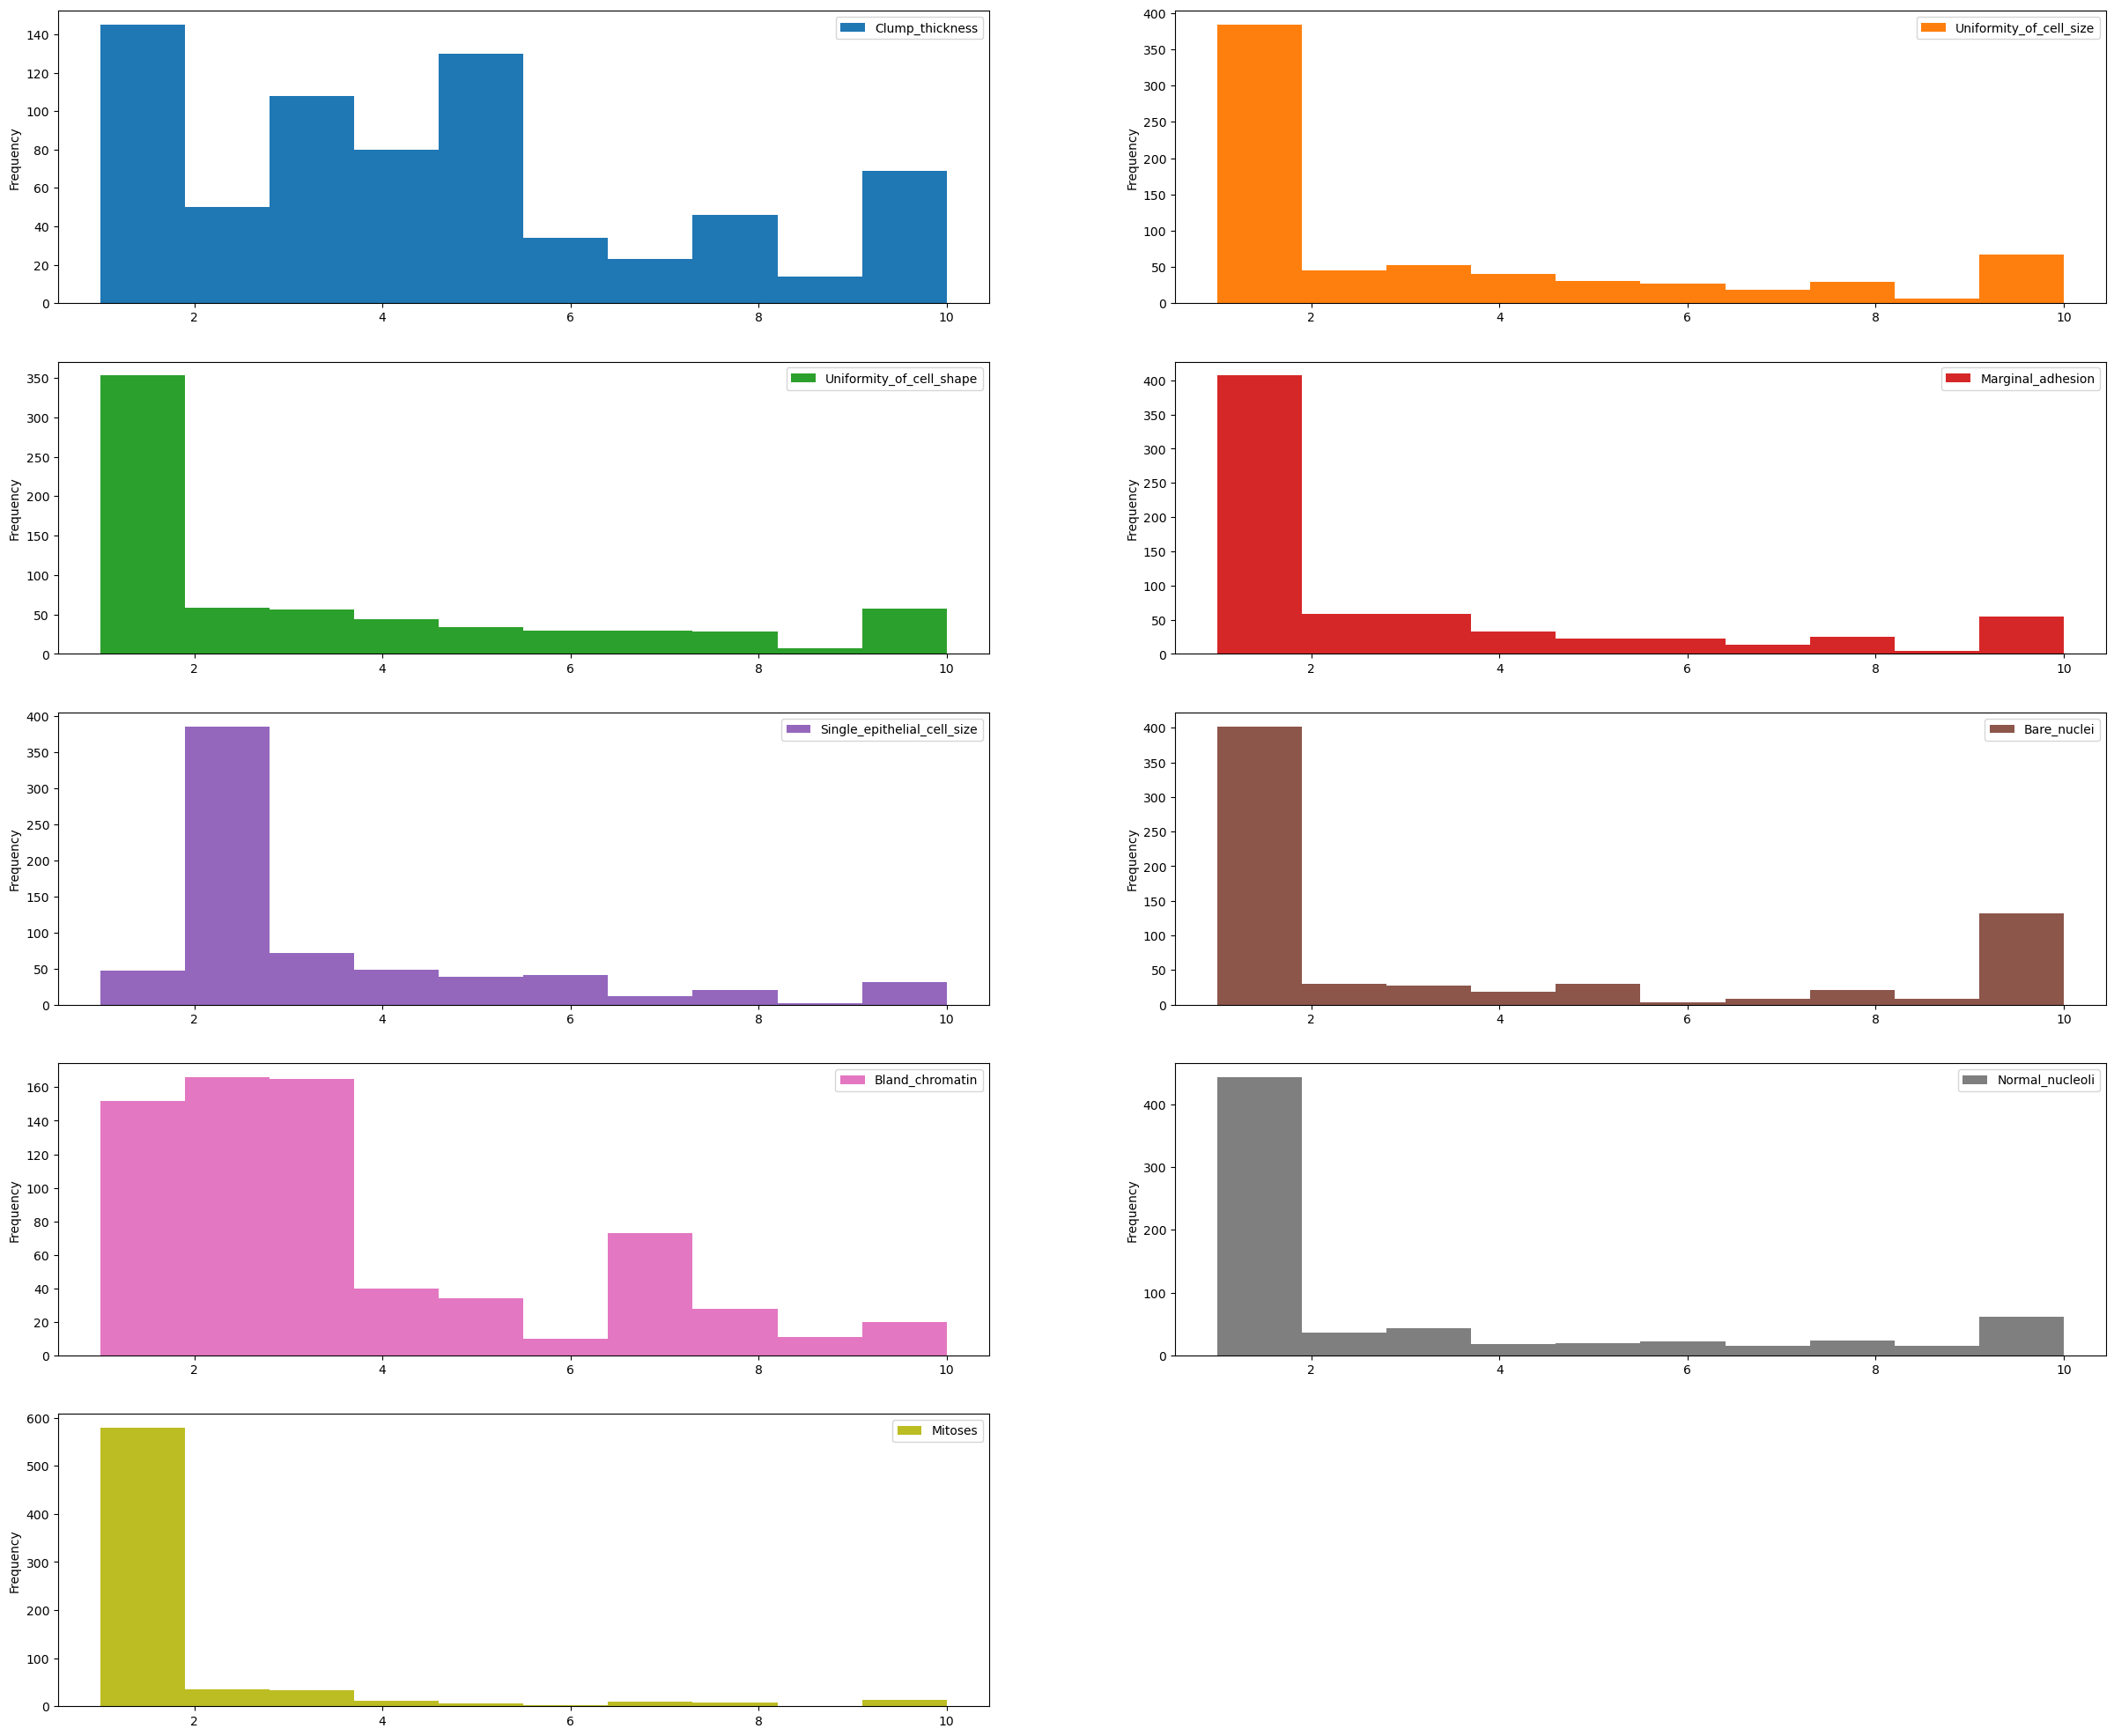

In [28]:
plt.rcParams["figure.figsize"] = (30,25)
x.plot(kind = "hist" , bins = 10 , subplots = True , layout = (5,2),sharex = False , sharey = False )
plt.show()

In [32]:
correlation1 =  x.corr()
correlation2 = y.corr()

In [37]:
correlation2["Class"].sort_values(ascending = False)

Class    1.0
Name: Class, dtype: float64

In [35]:
correlation1

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
Clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.593091,0.558428,0.535835,0.350034
Uniformity_of_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.691709,0.755721,0.722865,0.458693
Uniformity_of_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.713878,0.735948,0.719446,0.438911
Marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.670648,0.666715,0.603352,0.417633
Single_epithelial_cell_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.585716,0.616102,0.628881,0.479101
Bare_nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210
Bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.680615,1.000000,0.665878,0.344169
Normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.584280,0.665878,1.000000,0.428336
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.339210,0.344169,0.428336,1.000000


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size = 0.20 , random_state = 0)

In [40]:
x_train.shape , x_test.shape

((559, 9), (140, 9))

In [41]:
x_train.dtypes

Clump_thickness                  int64
Uniformity_of_cell_size          int64
Uniformity_of_cell_shape         int64
Marginal_adhesion                int64
Single_epithelial_cell_size      int64
Bare_nuclei                    float64
Bland_chromatin                  int64
Normal_nucleoli                  int64
Mitoses                          int64
dtype: object

In [42]:
x_train.isnull().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    13
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
dtype: int64

In [43]:
x_test.isnull().sum()

Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    3
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
dtype: int64

In [45]:
for col in x_train.columns:
    if x_train[col].isnull().mean()>0:
        print(col , round(x_train[col].isnull().mean(),4))

Bare_nuclei 0.0233


In [47]:
for df1 in [x_train , x_test]:
    for col in x_train.columns:
        col_median = x_train[col].median()
        df1[col].fillna(col_median , inplace = True)

C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_8568\69597164.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(col_median , inplace = True)


In [48]:
x_train.isnull().sum()

Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
dtype: int64

In [49]:
x_test.isnull().sum()

Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
dtype: int64

In [50]:
x_train.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
293,10,4,4,6,2,10.0,2,3,1
62,9,10,10,1,10,8.0,3,3,1
485,1,1,1,3,1,3.0,1,1,1
422,4,3,3,1,2,1.0,3,3,1
332,5,2,2,2,2,1.0,2,2,1


In [51]:
x_test.head

<bound method NDFrame.head of      Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
476                4                        1                         2   
531                4                        2                         2   
40                 6                        6                         6   
432                5                        1                         1   
14                 8                        7                         5   
..               ...                      ...                       ...   
310                2                        1                         1   
644                2                        1                         1   
523                7                        5                         6   
470                3                        1                         1   
45                 1                        1                         1   

     Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
4

In [53]:
cols = x_train.columns
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test =  scaler.transform(x_test)
x_train = pd.DataFrame(x_train , columns = [cols])
x_test = pd.DataFrame(x_test , columns = [cols])
x_train.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,2.028383,0.299506,0.289573,1.119077,-0.546543,1.858357,-0.577774,0.041241,-0.324258
1,1.669451,2.257680,2.304569,-0.622471,3.106879,1.297589,-0.159953,0.041241,-0.324258
2,-1.202005,-0.679581,-0.717925,0.074148,-1.003220,-0.104329,-0.995595,-0.608165,-0.324258
3,-0.125209,-0.026856,-0.046260,-0.622471,-0.546543,-0.665096,-0.159953,0.041241,-0.324258
4,0.233723,-0.353219,-0.382092,-0.274161,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258


In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [59]:
knn.fit(x_train , y_train)

C:\Users\HIMANSHU\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [61]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, 
metric='minkowski',
 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
 weights='uniform')


KNeighborsClassifier(n_neighbors=3)

In [62]:
y_pred = knn.predict(x_test)

In [64]:
y_pred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2], dtype=int64)

In [65]:
knn.predict_proba(x_test)[:,0]

array([1.        , 1.        , 0.33333333, 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.66666667,
       1.        , 1.        , 0.        , 0.33333333, 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.     

In [68]:
knn.predict_proba(x_test)[:,1]

array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.33333333,
       0.        , 0.        , 1.        , 0.66666667, 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.33333333, 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.     

# 15.Check the accuracy score

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
score = accuracy_score(y_test , y_pred)

In [71]:
score

0.9714285714285714

# compare training and testing accuracy

In [74]:
y_pred_train = knn.predict(x_train)
score = accuracy_score(y_train , y_pred_train)

In [75]:
score

0.9821109123434705

# overfitting and underfitting/

In [79]:
# print the scores on training and test set
knn.score(x_train , y_train)

0.9821109123434705

In [80]:
knn.score(x_test , y_test)

0.9714285714285714

In [81]:
y_test.value_counts()

Class
2        85
4        55
Name: count, dtype: int64

In [82]:
#check null accuracy 
null_accuracy = (85/(85+55))

In [83]:
null_accuracy 

0.6071428571428571

# Rebuild kNN classification model using different values of k

In [85]:
knn_5 =  KNeighborsClassifier(n_neighbors = 5)

In [86]:
knn_5.fit(x_train , y_train)

C:\Users\HIMANSHU\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [88]:
y_pred = knn_5.predict(x_test)

In [89]:
score = accuracy_score(y_pred , y_test)

In [90]:
#WHEN K = 5 THEN ACCURACY OF OUR MODEL IS 
score

0.9714285714285714

In [91]:
# Rebuild kNN Classification model using k=6
knn_6 = KNeighborsClassifier(n_neighbors = 6)

In [93]:
knn_6.fit(x_train , y_train)

C:\Users\HIMANSHU\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

In [94]:
y_pred = knn_6.predict(x_test)

In [95]:
score = accuracy_score(y_pred , y_test)

In [96]:
score

0.9785714285714285

In [97]:
knn_7 = KNeighborsClassifier(n_neighbors=7)

In [98]:
knn_7.fit(x_train , y_train)
y_pred = knn_7.predict(x_test)
score = accuracy_score(y_pred , y_test)

C:\Users\HIMANSHU\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [99]:
score

0.9785714285714285

In [100]:
knn_7 = KNeighborsClassifier(n_neighbors=9)
knn_7.fit(x_train , y_train)
y_pred = knn_7.predict(x_test)
score = accuracy_score(y_pred , y_test)

C:\Users\HIMANSHU\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [101]:
score

0.9714285714285714

In [102]:
from sklearn.metrics import confusion_matrix

In [103]:
cm = confusion_matrix(y_test , y_pred)

In [104]:
print("confusion_metrics" , cm)

confusion_metrics [[82  3]
 [ 1 54]]


In [107]:
print("tp = " , cm[0,0])
print("tn =", cm[1,1])
print("fp = " , cm[0,1])
print("fn = " , cm[1,0])

tp =  82
tn = 54
fp =  3
fn =  1


<Axes: >

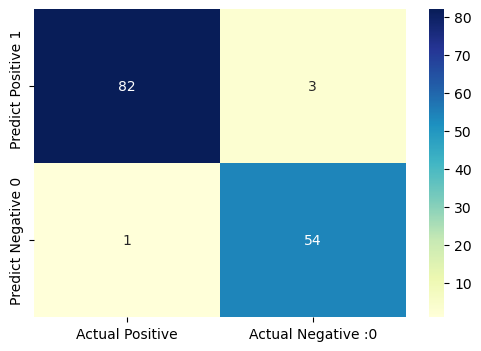

In [110]:
# Comment
plt.figure(figsize=(6,4))
cm_matrix = pd.DataFrame(data = cm , columns = ["Actual Positive" , "Actual Negative :0"], index = ["Predict Positive 1 " , "Predict Negative 0"])
sns.heatmap(cm_matrix , annot = True , fmt = "d" , cmap = "YlGnBu")

# 18. Classification metrices

In [111]:
from sklearn.metrics import classification_report

In [112]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           2       0.99      0.96      0.98        85
           4       0.95      0.98      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



In [113]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [114]:
classification_accuracy = (TP+TN) / float(TP+TN+FP+FN)
print(classification_accuracy)

0.9714285714285714


In [115]:
# Classification error
# # print classification error
classification_error = (FP+FN)/float(TP+TN+FP+FN)
print(classification_error)

0.02857142857142857


In [116]:
recall = TP / float(TP+FN)
print(recall)

0.9879518072289156


# True Positive Rate
True Positive Rate is synonymous with Recall

In [121]:
true_positive_rate = TP / float(TP+FN)
print(true_positive_rate)

0.9879518072289156


# False Positive Rate 

In [122]:
false_positive_rate = FP / float(FP + TN)
print(false_positive_rate)

0.05263157894736842


In [123]:
# Specificity
Specificity = TN/(TN+FP)
print(Specificity)

0.9473684210526315


In [124]:
# f1-score
y_pred_prob = knn.predict_proba(x_test)[0:10]
y_pred_prob

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333]])

In [127]:
# store the probabilities in dataframe
y_pred_prob_df = pd.DataFrame(data = y_pred_prob , 
                              
                              columns = ['Prob of - benign cancer (2)', 'Prob of - malignant cancer (4)'])
y_pred_prob_df

,Prob of - benign cancer (2),Prob of - malignant cancer (4)
0,1.000000,0.000000
1,1.000000,0.000000
2,0.333333,0.666667
3,1.000000,0.000000
4,0.000000,1.000000
5,1.000000,0.000000
6,0.000000,1.000000
7,1.000000,0.000000
8,0.000000,1.000000
9,0.666667,0.333333


In [128]:
knn.predict_proba(x_test)[0:10,1]

array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.33333333])

In [129]:
y_pred_1 = knn.predict_proba(x_test)[:,1]

(array([81.,  0.,  0.,  4.,  0.,  0.,  8.,  0.,  0., 47.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

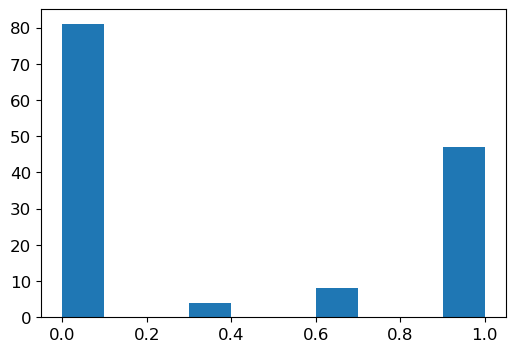

In [130]:
plt.figure(figsize=(6,4))
plt.rcParams['font.size'] = 12
plt.hist(y_pred_1, bins = 10)

Text(0, 0.5, 'Frequency')

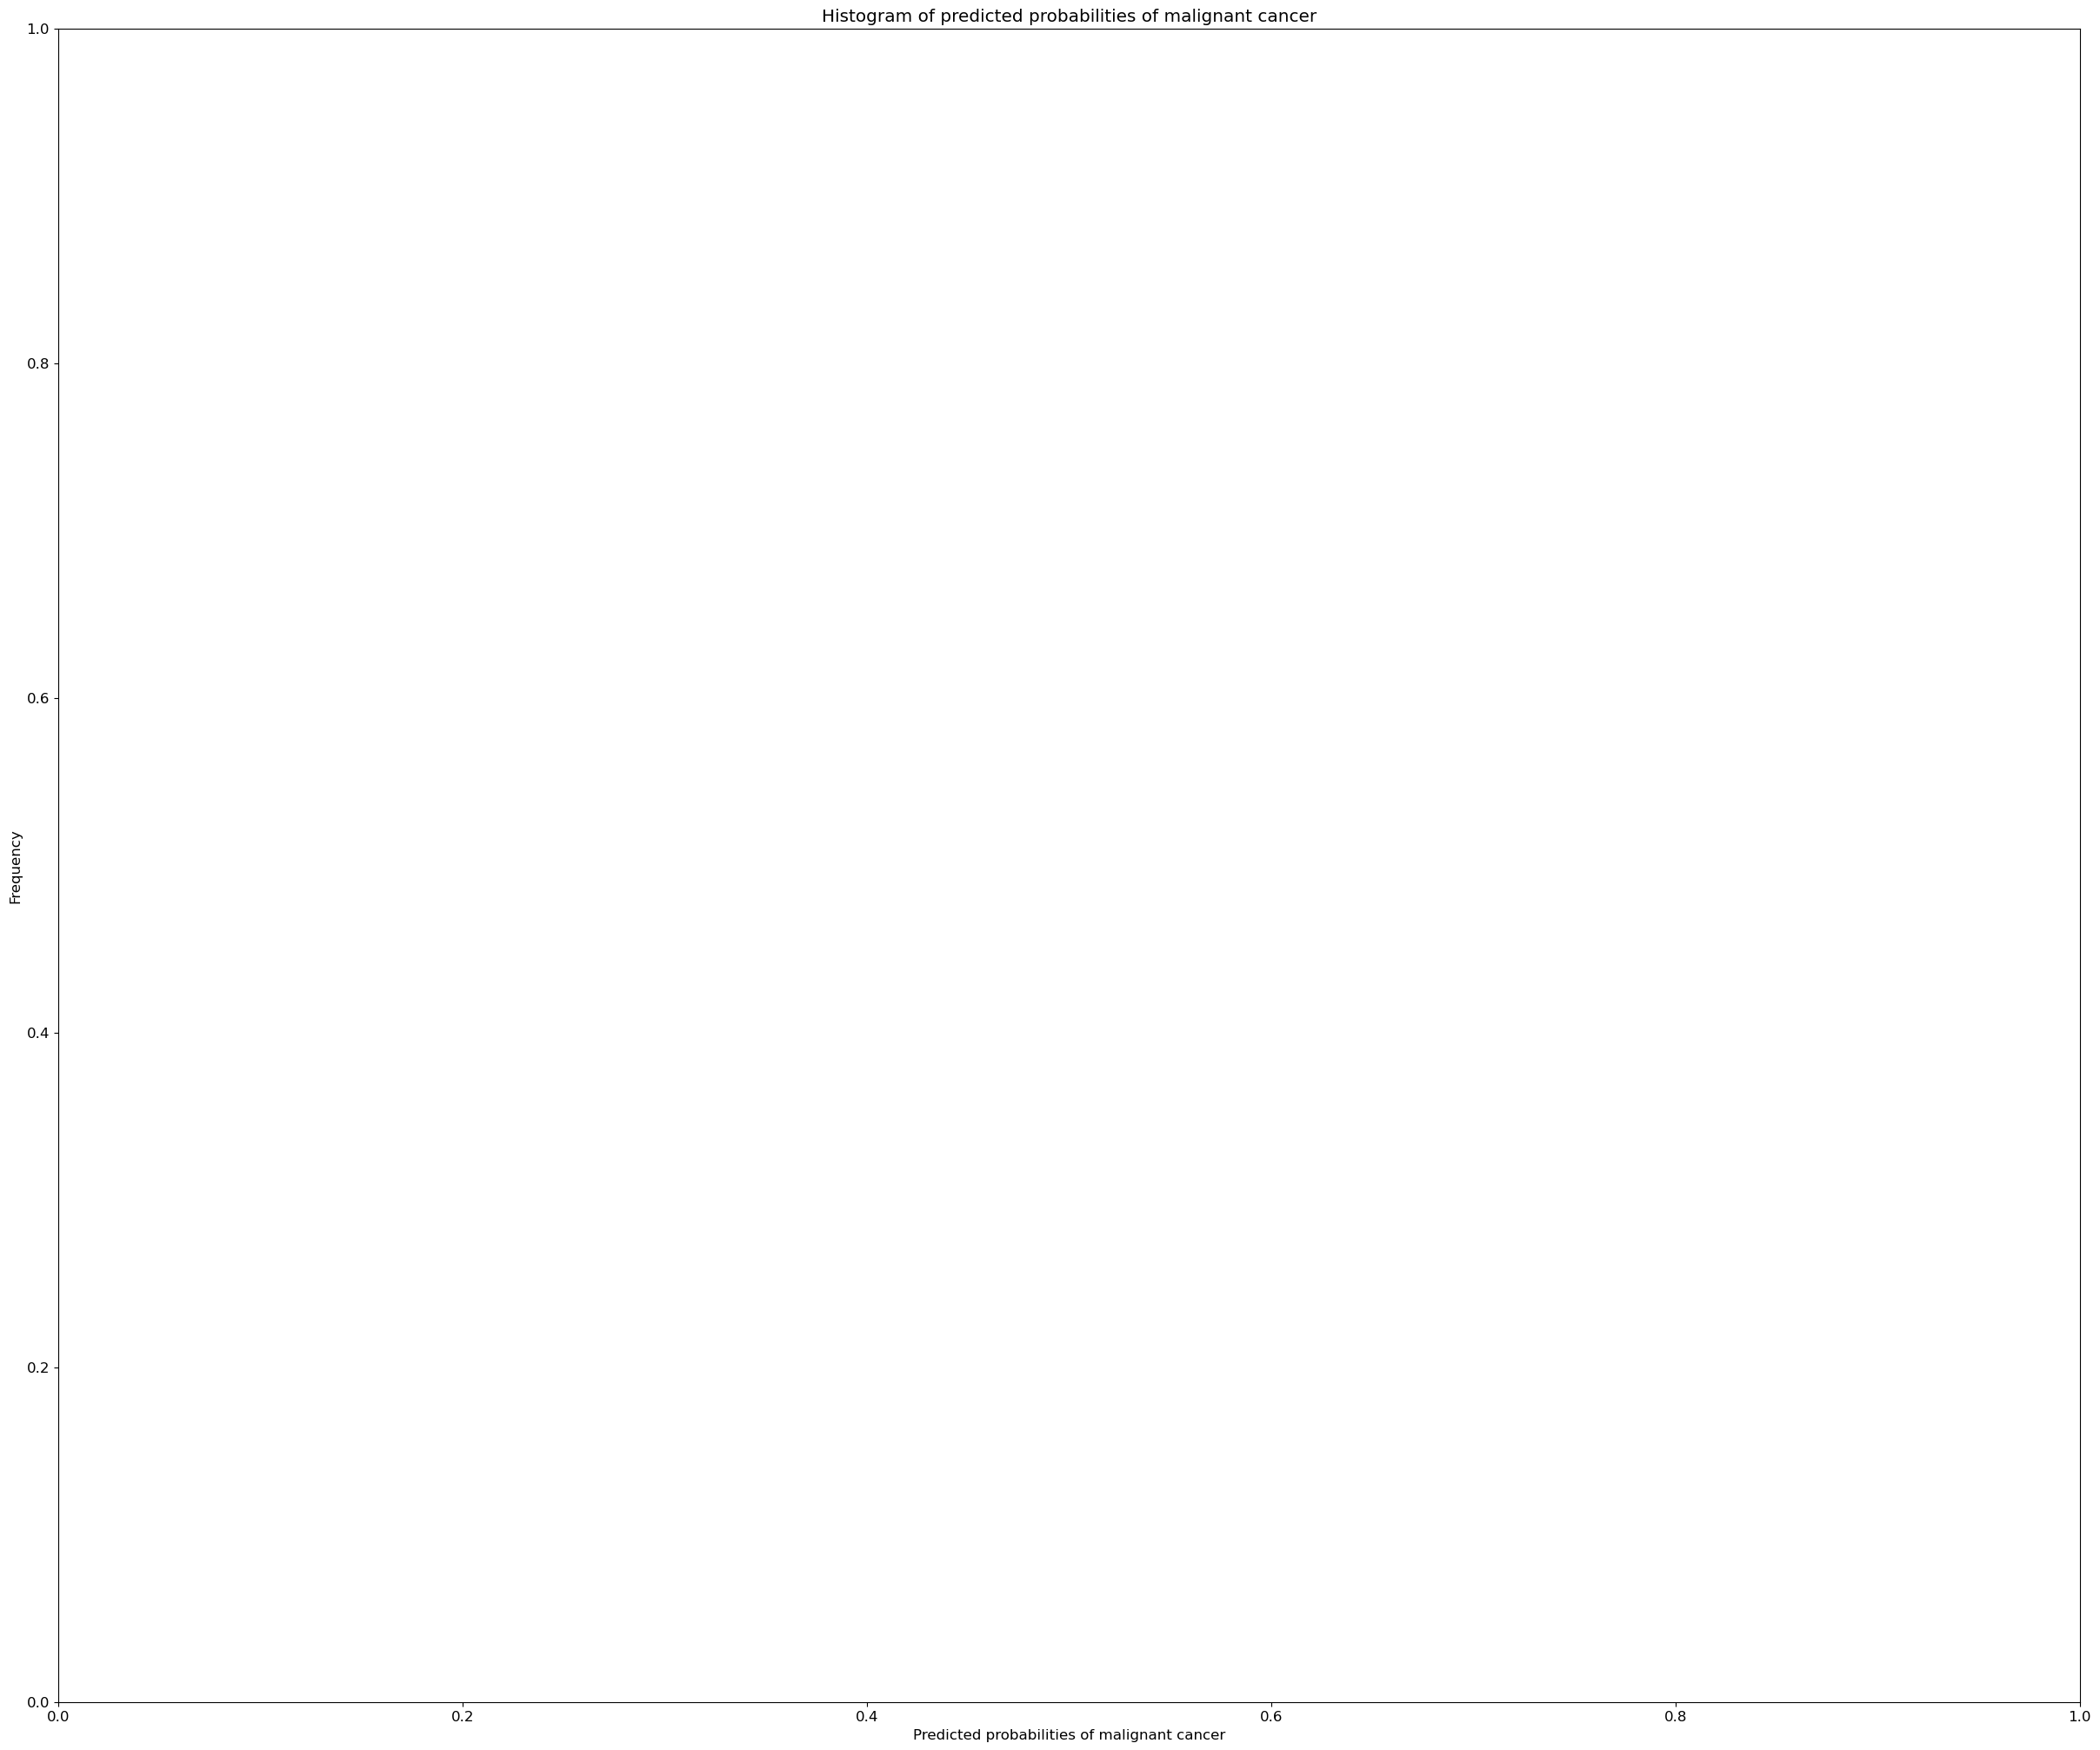

In [131]:
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of malignant cancer')
# set the x-axis limit
plt.xlim(0,1)
# set the title
plt.xlabel('Predicted probabilities of malignant cancer')
plt.ylabel('Frequency')

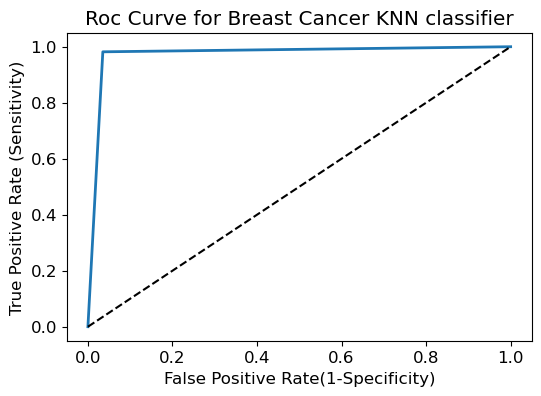

In [135]:
# Observations
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test , y_pred , pos_label=4)
plt.figure(figsize  = (6,4))
plt.plot(fpr,tpr , linewidth = 2)
plt.plot([0,1],[0,1],"k--")
plt.rcParams["font.size"]=12
plt.title("Roc Curve for Breast Cancer KNN classifier")
plt.xlabel("False Positive Rate(1-Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.show()

In [137]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test , y_pred)
print(ROC_AUC)

0.9732620320855616


In [140]:
from sklearn.model_selection import cross_val_score
cross_validated_ROC_AUC = cross_val_score(knn_7,x_train , y_train,cv = 5 , scoring ="roc_auc").mean()
print(cross_validated_ROC_AUC)

0.99258368895211


C:\Users\HIMANSHU\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HIMANSHU\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HIMANSHU\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HIMANSHU\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

In [141]:
# Applying 10-Fold Cross Validation
scores = cross_val_score(knn_7,x_train , y_train , cv = 10 , scoring = "accuracy")
print(scores)

C:\Users\HIMANSHU\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HIMANSHU\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HIMANSHU\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HIMANSHU\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

[0.85714286 0.96428571 0.94642857 0.98214286 0.96428571 0.96428571
 0.98214286 0.98214286 1.         0.96363636]


C:\Users\HIMANSHU\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HIMANSHU\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [142]:
print(scores.mean())

0.9606493506493505
